In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#extra code - the exact arguments of make-blobs() are the not important
blob_centers = np.array([[0.2, 2.3], [-1.6, 2.3], [-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples = 2000, centers=blob_centers, cluster_std = blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters = k, n_init = 10, random_state=7)  #n_init bashlama sayidi. 10 defe ferqli qiymetlerle baslanacaq
y_pred = kmeans.fit_predict(X)

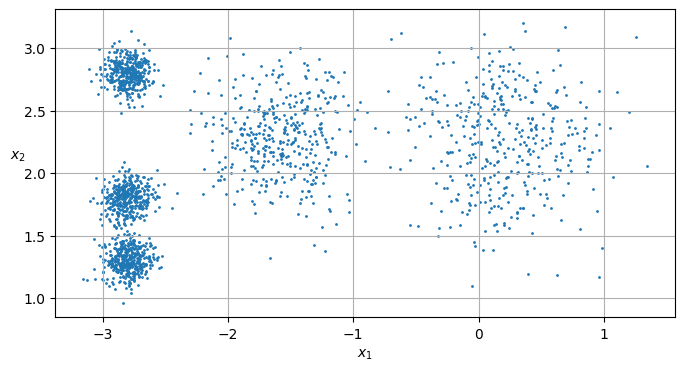

In [ ]:
def plot_clusters(X, y = None):
  plt.scatter(X[:,0], X[:,1], c=y, s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation = 0)

plt.figure(figsize = (8,4))
plot_clusters(X)
plt.grid()
plt.show()

In [ ]:
y_pred

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [ ]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20845259,  2.25564354],
       [-2.78607039,  2.79514817],
       [-1.55686265,  2.28114151],
       [-2.8028651 ,  1.80176432]])

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

In [ ]:
X_new.shape, X.shape      #sutun saylari beraber olmalidir

((4, 2), (2000, 2))

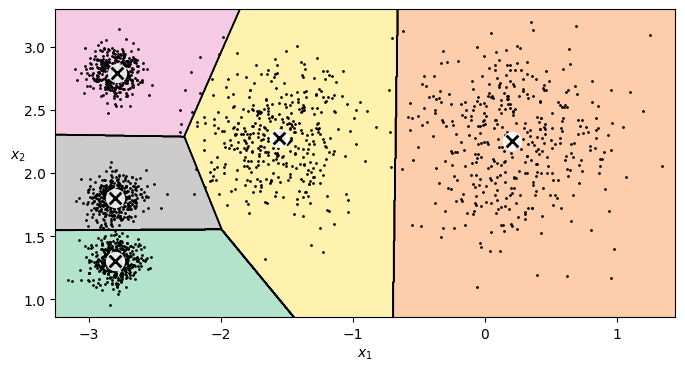

In [ ]:
def plot_data(X):
   plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
   if weights is not None:
       centroids = centroids[weights > weights.max() / 10]
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
   mins = X.min(axis=0) - 0.1
   maxs = X.max(axis=0) + 0.1
   xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
   Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)


   plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
   plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')
   plot_data(X)
   if show_centroids:
       plot_centroids(clusterer.cluster_centers_)


   if show_xlabels:
       plt.xlabel("$x_1$")
   else:
       plt.tick_params(labelbottom=False)
   if show_ylabels:
       plt.ylabel("$x_2$", rotation=0)
   else:
       plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [ ]:
kmeans.transform(X_new).round(2) # yeni yaratdigimiz datasetin her bir klaster merkezinden mesafesine baxir      4 datanin (row) 5 cluster center`e mesafesi

array([[2.89, 0.33, 2.9 , 1.58, 2.81],
       [5.84, 2.8 , 5.84, 4.57, 5.81],
       [1.71, 3.29, 0.3 , 1.61, 1.21],
       [1.22, 3.22, 0.36, 1.46, 0.73]])

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init = good_init, n_init = 1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

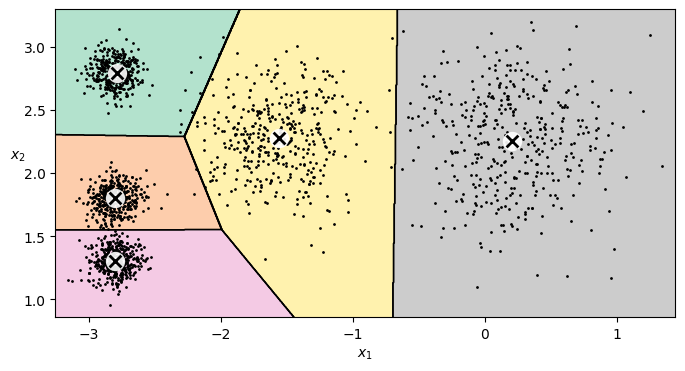

In [ ]:
plt.figure(figsize = (8,4))
plot_decision_boundaries(kmeans, X)

In [ ]:
kmeans.inertia_

211.29488832043148

In [ ]:
kmeans.score(X)

-211.29488832043148

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters = 5, init = 'random', n_init = 10,
                             random_state = 2)

kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

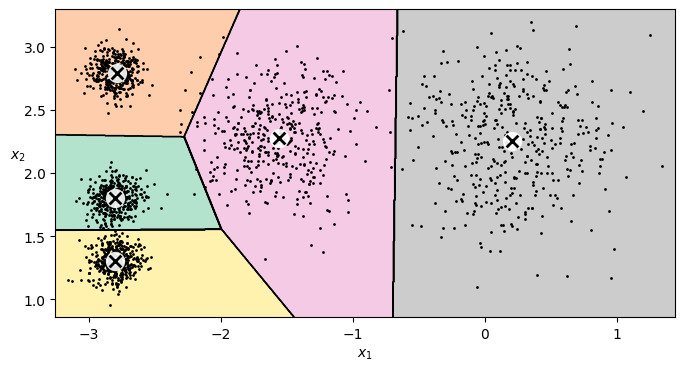

In [ ]:
plt.figure(figsize = (8,4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [ ]:
kmeans_rnd_10_inits.inertia_

211.2931041526368

formalar oval kimi olanda k_means yaxsi netice vermir

#Mini-batch K-Means

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 5, n_init=3, random_state = 42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

yaxsi terefi ondadi ki, daha az data uzerinde isleyir, amma bu accuracyni biraz asagi salir. Cox daha suretlidi

In [ ]:
minibatch_kmeans.inertia_

211.34550521201544

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, n_init = 10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init = 10, random_state=42)

plt.show()

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, n_init = 10, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

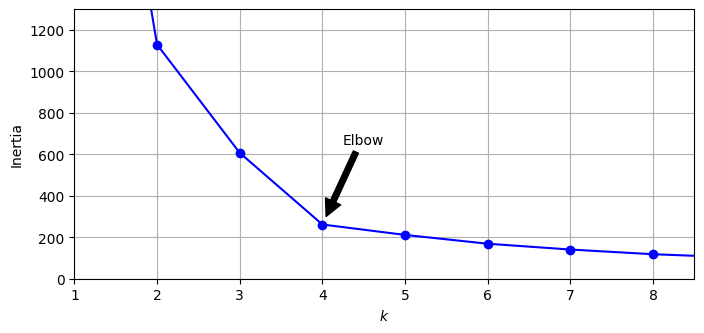

In [ ]:
plt.figure(figsize = (8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy = (4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor = 'black', shrink = 0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment = 'center')
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

#Limits of K-Means

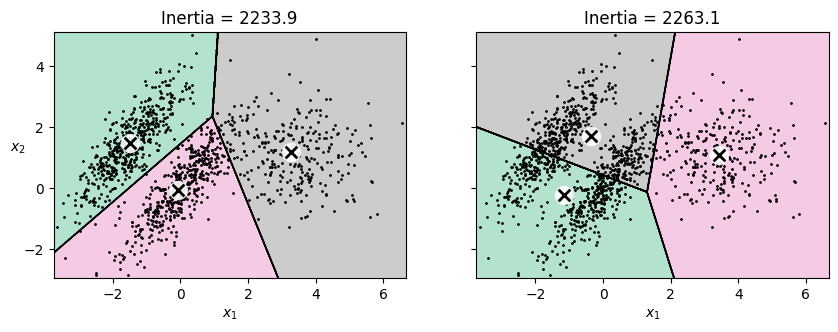

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4),(0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.347, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]             # r_ --> arraylari concat edir

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=1, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}")

plt.show()

In [ ]:
import PIL

image = np.asarray(PIL.Image.open("/content/ladybug.png"))
image.shape

(533, 800, 3)

array([[[ 25,  29,   2],
        [ 24,  28,   1],
        [ 24,  29,   0],
        ...,
        [ 57, 105,  21],
        [ 56, 103,  22],
        [ 52,  99,  19]],

       [[ 24,  28,   1],
        [ 23,  27,   0],
        [ 23,  27,   0],
        ...,
        [ 60, 108,  22],
        [ 59, 106,  25],
        [ 55, 102,  22]],

       [[ 23,  27,   2],
        [ 22,  26,   1],
        [ 22,  26,   0],
        ...,
        [ 66, 114,  28],
        [ 63, 111,  27],
        [ 58, 105,  24]],

       ...,

       [[ 14,  18,   1],
        [ 14,  18,   1],
        [ 13,  20,   2],
        ...,
        [ 13,  61,   3],
        [  9,  56,   2],
        [  5,  51,   2]],

       [[ 14,  18,   1],
        [ 14,  18,   1],
        [ 12,  19,   1],
        ...,
        [ 11,  59,   1],
        [  7,  54,   0],
        [  3,  49,   0]],

       [[ 13,  17,   0],
        [ 13,  17,   0],
        [ 11,  18,   0],
        ...,
        [ 10,  58,   0],
        [  5,  52,   0],
        [  2,  48,   0]]], dtype=uint8)
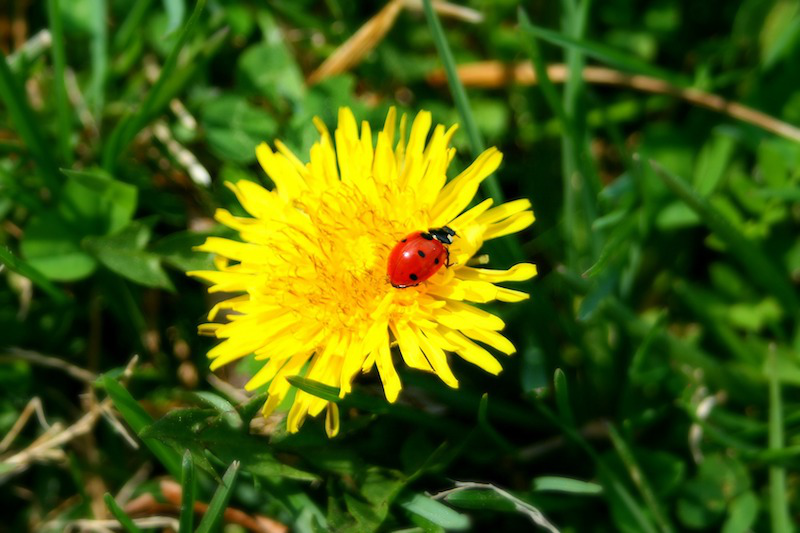

In [ ]:
image

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init = 10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [ ]:
X

array([[25, 29,  2],
       [24, 28,  1],
       [24, 29,  0],
       ...,
       [10, 58,  0],
       [ 5, 52,  0],
       [ 2, 48,  0]], dtype=uint8)

In [ ]:
segmented_img

array([[[ 5.6105612 , 27.61743918,  1.44857047],
        [ 5.6105612 , 27.61743918,  1.44857047],
        [ 5.6105612 , 27.61743918,  1.44857047],
        ...,
        [54.37997208, 97.09151272, 14.07131629],
        [54.37997208, 97.09151272, 14.07131629],
        [54.37997208, 97.09151272, 14.07131629]],

       [[ 5.6105612 , 27.61743918,  1.44857047],
        [ 5.6105612 , 27.61743918,  1.44857047],
        [ 5.6105612 , 27.61743918,  1.44857047],
        ...,
        [54.37997208, 97.09151272, 14.07131629],
        [54.37997208, 97.09151272, 14.07131629],
        [54.37997208, 97.09151272, 14.07131629]],

       [[ 5.6105612 , 27.61743918,  1.44857047],
        [ 5.6105612 , 27.61743918,  1.44857047],
        [ 5.6105612 , 27.61743918,  1.44857047],
        ...,
        [54.37997208, 97.09151272, 14.07131629],
        [54.37997208, 97.09151272, 14.07131629],
        [54.37997208, 97.09151272, 14.07131629]],

       ...,

       [[ 5.6105612 , 27.61743918,  1.44857047],
        [ 5

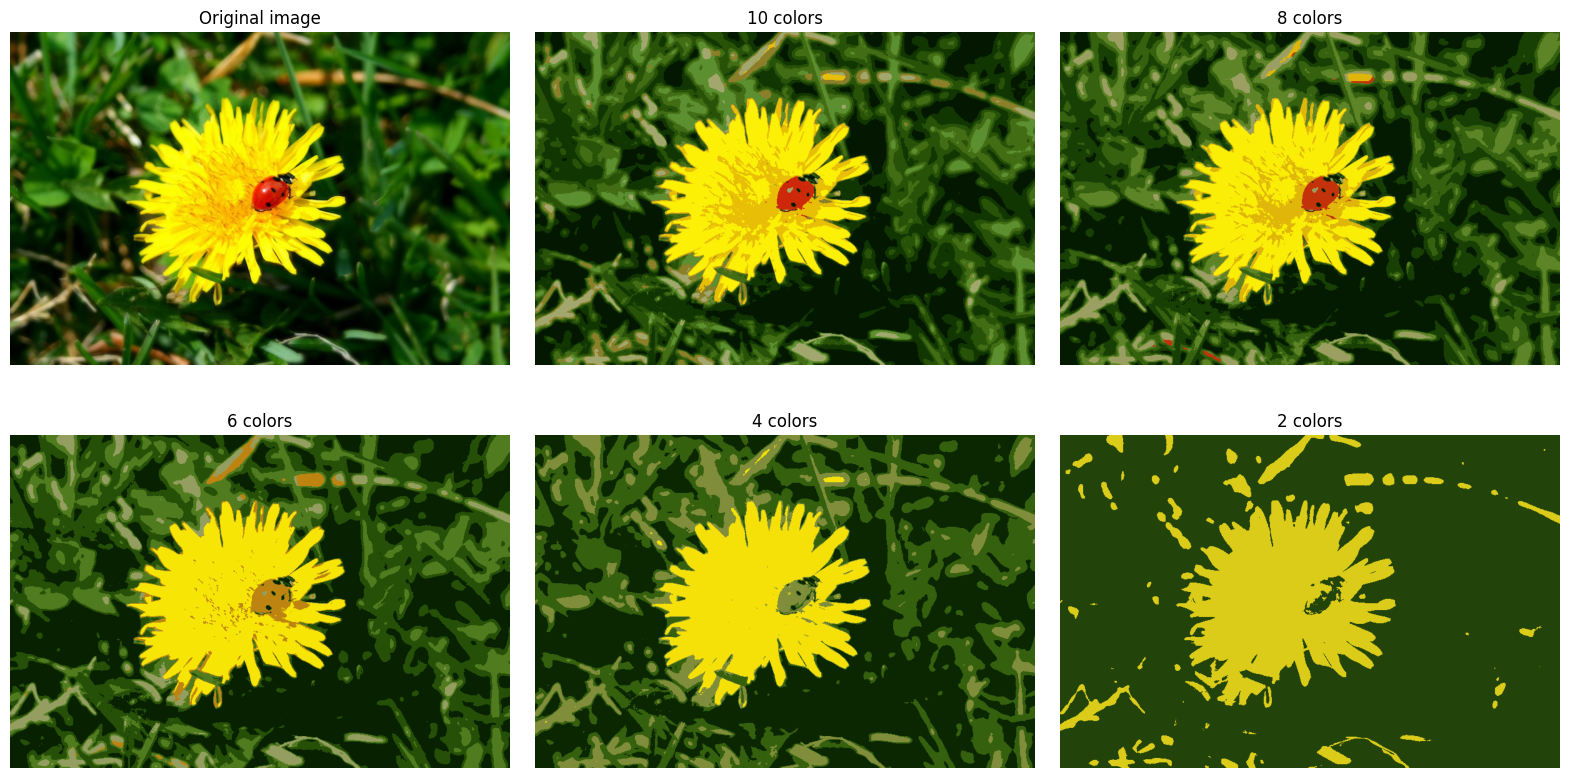

In [ ]:
segmented_imgs = []

n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
  kmeans = KMeans(n_clusters=n_clusters, n_init = 10, random_state=42).fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize = (20, 10))
plt.subplots_adjust(wspace = 0.05, hspace = 0.1)


plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original image')
plt.axis('off')



for idx, n_clusters in enumerate(n_colors):
  plt.subplot(2, 3, 2 + idx)
  plt.imshow(segmented_imgs[idx] / 255)
  plt.title(f"{n_clusters} colors")
  plt.axis('off')
plt.show()

#Using Clustering for Semi-Supervised Learning

Another use case for clustering is semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances

In [ ]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y = True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [ ]:
from sklearn.linear_model import LogisticRegression
n_labeled = 50
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [ ]:
log_reg_full = LogisticRegression(max_iter = 10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9093198992443325

In [ ]:
k = 50
kmeans = KMeans(n_clusters = k, n_init = 10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis = 0)
X_representative_digits = X_train[representative_digit_idx]

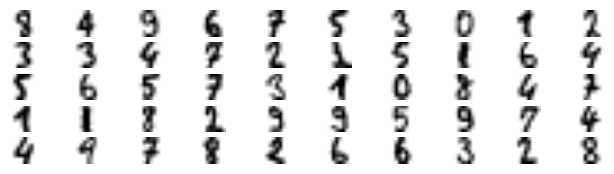

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(k // 10, 10, index + 1)
  plt.imshow(X_representative_digit.reshape(8, 8), cmap='binary', interpolation = 'bilinear')
  plt.axis('off')

plt.show()

In [ ]:
y_representative_digits = np.array([
    8,4,9,6,7,5,3,0,1,2,
    3,3,4,7,2,1,5,1,6,4,
    5,6,5,7,3,1,0,8,4,7,
    1,1,8,2,9,9,5,9,7,4,
    4,9,7,8,2,6,6,3,2,8
])

In [ ]:
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8387909319899244

In [ ]:
log_reg.score(X_train, y_train)

0.9364285714285714

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype = np.int64)
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
y_representative_digits

array([8, 4, 9, 6, 7, 5, 3, 0, 1, 2, 3, 3, 4, 7, 2, 1, 5, 1, 6, 4, 5, 6,
       5, 7, 3, 1, 0, 8, 4, 7, 1, 1, 8, 2, 9, 9, 5, 9, 7, 4, 4, 9, 7, 8,
       2, 6, 6, 3, 2, 8])

In [ ]:
kmeans.labels_

array([ 7, 31, 44, ..., 40, 40, 23], dtype=int32)

In [ ]:
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.8589420654911839

In [ ]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_==i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] =-1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

In [ ]:
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9143576826196473

In [ ]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

1.0

np.percentile is good to find anomalities

#DBSCAN

Density based

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples = 1000, noise = 0.05, random_state = 42)
dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=0.05)

eps boyuk olanda o demekdiki bir datanin etrafinda en az nece noqte olsa onu merkez kimi goturur ve dbscan boyuk olculu datalarda effektiv deyil

In [ ]:
dbscan.labels_[:10]          # -1 ler anomality lerdi

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
dbscan.core_sample_indices_[:10]    # indexlerdi, ama burda anomalities yoxdu

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
dbscan.components_      #indices- in hansi kordinatlarda yerlesdiyi gorunur

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

#Gausion Mixtures

In [ ]:
X1, y1 = make_blobs(n_samples = 1000, centers =((4, -4), (0, 0)), random_state = 42)
X1 = X1.dot(np.array([[0.0374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples = 250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=3, n_init = 10, random_state = 42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
gm.weights_             #her bir merkez noqtesine gore dusme ehtimslidi

array([0.39278103, 0.20641988, 0.40079909])

In [ ]:
gm.means_            #merkezlerin kordinatlari

array([[ 0.0385396 ,  0.0896705 ],
       [ 3.43441572,  1.0362621 ],
       [-2.74961742,  1.4303099 ]])

In [ ]:
gm.covariances_       #yayilma

array([[[0.54680448, 0.51057165],
        [0.51057165, 1.22226293]],

       [[1.08238348, 0.00761971],
        [0.00761971, 0.95592421]],

       [[0.53004358, 0.44226126],
        [0.44226126, 1.16748404]]])

In [ ]:
gm.n_iter_     #nece defe run olub

3

In [ ]:
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1])

In [ ]:
gm.predict_proba(X).round(3)    #nece faiz dusunursenki hemin merkeze aiddi

array([[0.99 , 0.01 , 0.   ],
       [0.996, 0.003, 0.001],
       [0.   , 0.   , 1.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]])

Active learning - En ehemiyyetli oldugunu dusunduyunuz datalari labelleyirik
meselen modelin en az emin oldugu instaneceler uzerinde labelling ede bilerik oln pis oldugu klass uzre labeling ede bilerik

In [ ]:
X_new, y_new = gm.sample(6)   #sintetik (suni) data yaradir

X_new

array([[-1.03673597, -0.23195427],
       [ 0.28179524,  0.28414076],
       [ 1.74909019,  1.6865828 ],
       [ 3.89028811,  1.59492775],
       [ 3.943062  ,  0.61073859],
       [-1.94137553,  0.6955922 ]])

In [ ]:
y_new

array([0, 0, 1, 1, 1, 2])